In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#Read the yearly dataset
yearly_df = pd.read_csv(r"C:\Users\lavan\Downloads\Python-Projects-The-Discovery-of-Handwashing\Data\yearly_deaths_by_clinic.csv")

yearly_df

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [3]:
yearly_df.shape

(12, 4)

In [4]:
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


In [5]:
yearly_df.groupby("clinic") ["deaths"].sum()

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64

In [6]:
yearly_df["Proportion of Deaths"] = yearly_df["deaths"] / yearly_df["births"]
yearly_df

,year,births,deaths,clinic,Proportion of Deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [7]:
clinic_1 = yearly_df[yearly_df["clinic"] == "clinic 1"]
clinic_2 = yearly_df[yearly_df["clinic"] == "clinic 2"]

Text(0, 0.5, 'Number of Deaths')

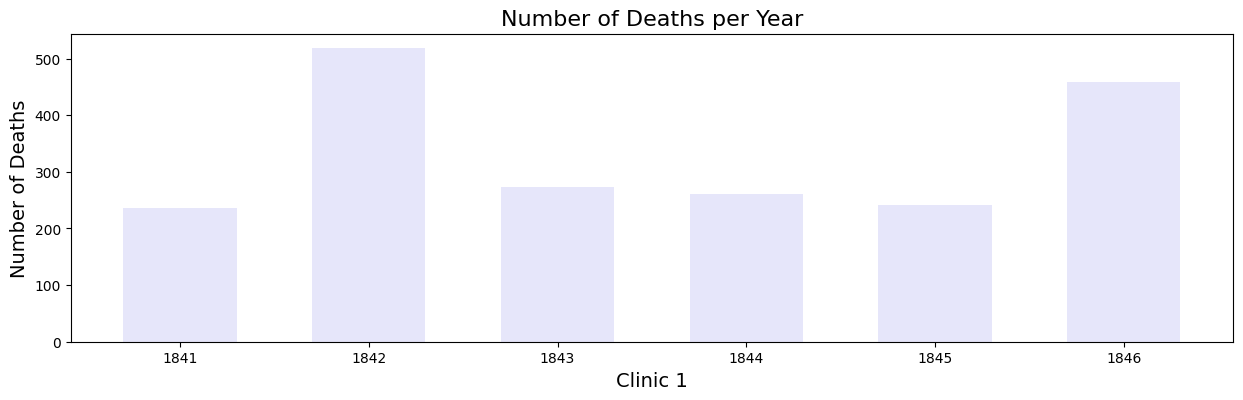

In [34]:
fig,ax = plt.subplots(figsize = (15,4))
plt.bar(clinic_1.year, clinic_1.deaths, width= 0.6, color= "lavender")
plt.title("Number of Deaths per Year", fontsize=16)
plt.xlabel("Clinic 1", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)

Text(0, 0.5, 'Number of Deaths')

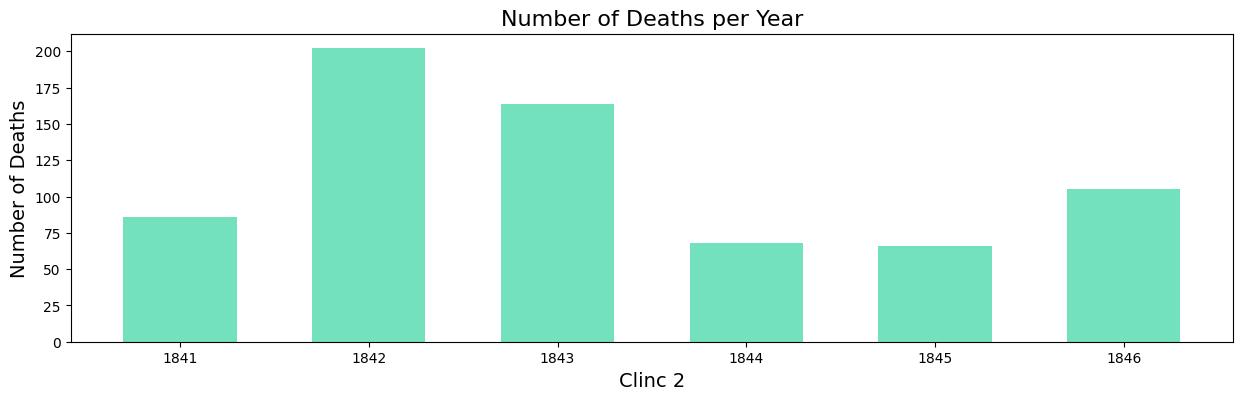

In [32]:
fig,ax = plt.subplots(figsize = (15,4))
plt.bar(clinic_2.year, clinic_2.deaths, width= 0.6, color= "#74E1BE")
plt.title("Number of Deaths per Year", fontsize=16)
plt.xlabel("Clinc 2", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)

<Axes: xlabel='year', ylabel='Proportion of Deaths'>

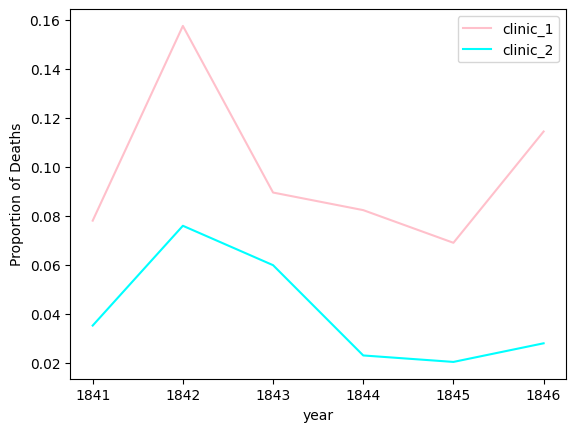

In [33]:
ax= clinic_1.plot(x= "year", y= "Proportion of Deaths", label= "clinic_1", color="pink")
clinic_2.plot(x= "year", y= "Proportion of Deaths", label= "clinic_2", ax=ax, ylabel= "Proportion of Deaths", color="cyan")

In [11]:
monthly_df = pd.read_csv(r"C:\Users\lavan\Downloads\Python-Projects-The-Discovery-of-Handwashing\Data\monthly_deaths.csv")
monthly_df.head(5)

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [12]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [13]:
monthly_df["Proportion of Deaths to Birth"]= monthly_df["deaths"] / monthly_df["births"]
monthly_df.head(5)

,date,births,deaths,Proportion of Deaths to Birth
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [14]:
monthly_df.dtypes
monthly_df['date'] =  pd.to_datetime(monthly_df['date'])

In [15]:
start_handwashing = pd.to_datetime('1847-06-01')

In [16]:
before_washing = monthly_df[monthly_df["date"] < start_handwashing]
after_washing = monthly_df[monthly_df["date"] >= start_handwashing]

<Axes: xlabel='date', ylabel='Proportion deaths to births'>

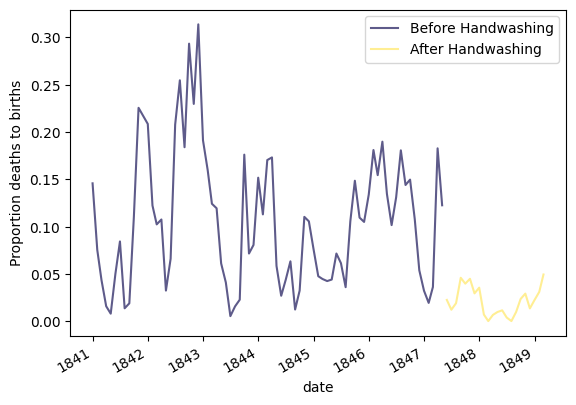

In [29]:
ax= before_washing.plot(x= "date", y= "Proportion of Deaths to Birth", label= "Before Handwashing", color="#5e5b8a")
after_washing.plot(x= "date", y= "Proportion of Deaths to Birth", label= "After Handwashing", ax=ax, ylabel= "Proportion deaths to births", color="#ffee93") 

<Axes: xlabel='year', ylabel='Proportion of Deaths'>

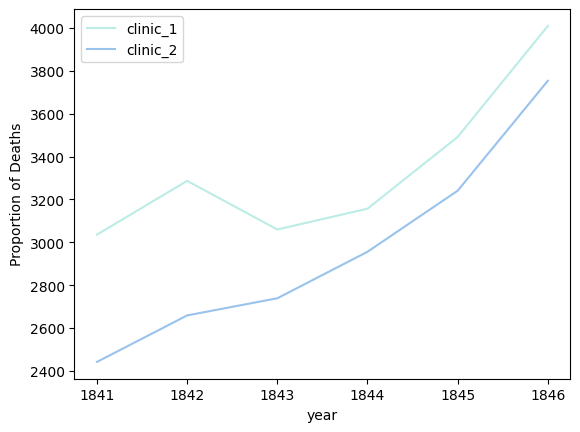

In [19]:
ax= clinic_1.plot(x= "year", y= "births", label= "clinic_1", color="#bcece6")
clinic_2.plot(x= "year", y= "births", label= "clinic_2", ax=ax, ylabel= "Proportion of Deaths", color="#99c3ec")

Text(0, 0.5, 'Proportion of Deaths')

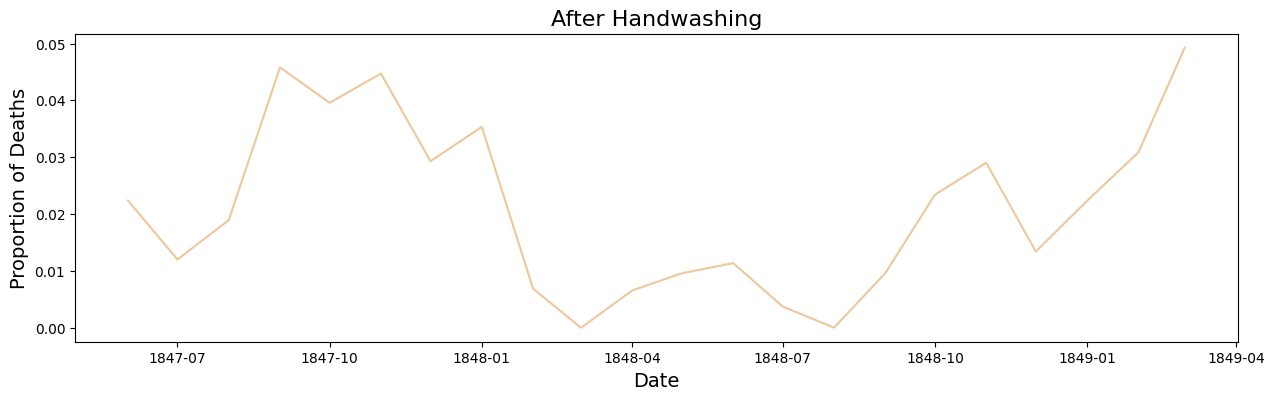

In [31]:
fig,ax = plt.subplots(figsize = (15,4))
x= after_washing["date"]
y= after_washing["Proportion of Deaths to Birth"]
plt.plot(x, y, color= "#ecc89b")
plt.title("After Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)

Text(0, 0.5, 'Proportion of Deaths')

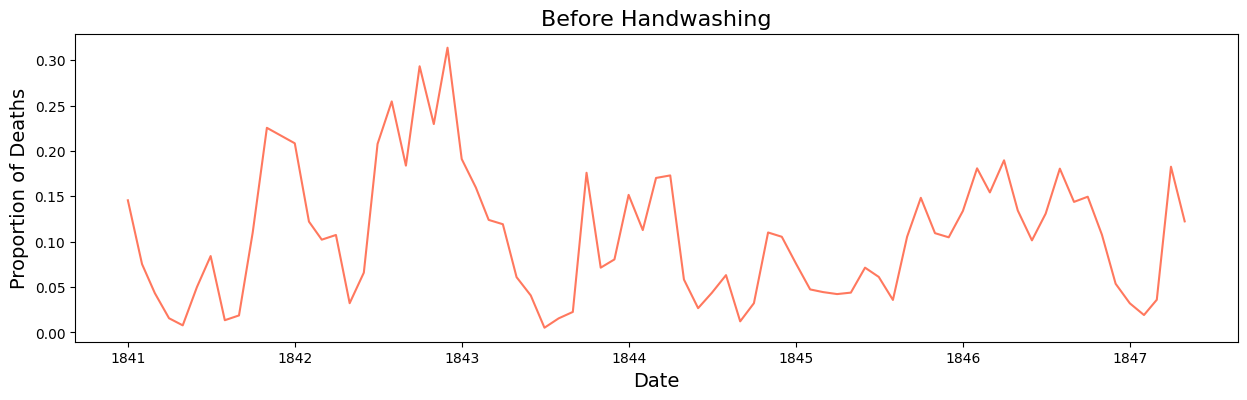

In [30]:
fig,ax = plt.subplots(figsize = (15,4))
x= before_washing["date"]
y= before_washing["Proportion of Deaths to Birth"]
plt.plot(x, y, color= "#FF785E")
plt.title("Before Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)

In [22]:
before_proportion = before_washing["Proportion of Deaths to Birth"]
after_proportion = after_washing["Proportion of Deaths to Birth"]
before_proportion.mean()

np.float64(0.10504998260908789)

In [23]:
after_proportion.mean()

np.float64(0.021093375097254535)

In [24]:
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

np.float64(-0.08395660751183336)